In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12122 entries, 0 to 12121
Data columns (total 9 columns):
#                 12122 non-null int64
INCIDENT TITLE    12122 non-null object
INCIDENT DATE     12122 non-null object
LOCATION          12122 non-null object
DESCRIPTION       11604 non-null object
CATEGORY          12122 non-null object
LATITUDE          11691 non-null float64
LONGITUDE         11691 non-null float64
More Info         173 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 852.4+ KB


In [3]:
data = df.copy()

In [4]:
df.describe()

,#,LATITUDE,LONGITUDE
count,12122.000000,11691.000000,11691.000000
mean,6095.682313,21.033644,70.011383
std,3450.470807,10.560667,19.762169
min,1.000000,-33.870665,-122.563443
25%,3143.250000,19.022629,72.843590
50%,6135.500000,27.686218,77.158582
75%,9006.750000,28.609013,77.315212
max,12228.000000,55.780277,160.657216


In [5]:
df.head(10)

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,More Info
0,12152,touching,27-05-2019 15:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,"Touching /Groping,",25.625485,85.055803,NaN
1,12149,whistling,17-05-2019 19:00,"Near Nissan Showroom, Bailey Rd, Patna, Bihar ...",I was in market with my mom. There I saw a man...,"Catcalls/Whistles,",25.619769,85.045596,NaN
2,12213,sexual invite,15-05-2019 15:03,"Makina, Nairobi, Kenya",there is a girl whom boys have been writing a ...,"Sexual Invites,",-1.308482,36.789595,NaN
3,12199,sexual invite,14-05-2019 14:13,"Makina, Nairobi, Kenya",there is a girl who is being disturbed y a bo...,"Sexual Invites,",-1.308482,36.789595,NaN
4,12206,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,NaN
5,12205,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,NaN
6,12204,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,NaN
7,12203,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,NaN
8,12202,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,NaN
9,12200,touchings,13-05-2019 14:21,"Makina, Nairobi, Kenya",there is a teacher who likes touching a girl o...,"Sexual Invites,",-1.308482,36.789595,NaN


## Checking Missing data perc of each column

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

percent_missing

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


#                  0.000000
INCIDENT TITLE     0.000000
INCIDENT DATE      0.000000
LOCATION           0.000000
DESCRIPTION        4.273222
CATEGORY           0.000000
LATITUDE           3.555519
LONGITUDE          3.555519
More Info         98.572843
dtype: float64

In [7]:
del df['More Info']

In [8]:
df['CATEGORY'].unique()

array(['Touching /Groping, ', 'Catcalls/Whistles, ', 'Sexual Invites, ',
       'Stalking, ', 'Others, ', 'Commenting, ',
       'Rape / Sexual Assault, ',
       'Sexual Invites, North East India Report, ',
       'Sexual Invites, Rape / Sexual Assault, ',
       'Catcalls/Whistles, Stalking, ',
       'Indecent exposure, Sexual Invites, ',
       'Catcalls/Whistles, Sexual Invites, ',
       'Commenting, Stalking, Touching /Groping, ',
       'Chain Snatching, Others, ', 'Chain Snatching, ',
       'Catcalls/Whistles, Commenting, Touching /Groping, ',
       'Ogling/Facial Expressions/Staring, ', 'Indecent exposure, ',
       'Catcalls/Whistles, Commenting, ',
       'Touching /Groping, Sexual Invites, ',
       'Commenting, Touching /Groping, ', 'Commenting, Stalking, ',
       'Taking pictures, ', 'Touching /Groping, Sexual Invites, Others, ',
       'Touching /Groping, Others, ', 'Sexual Invites, Others, ',
       'Indecent exposure, Sexual Invites, Others, ',
       'Commenting, 

In [99]:
len(df['CATEGORY'].unique())

691

## Now as you can see there are over `691` unique categories which is impossible to interpret during EDA in `Heatmap` or any categorical visualization , so I created basic crime level column using this below analogy

### many crimes are repeated several times thats why there are lots of unique


| Sexual Crime Type                            | Level of Crime |
|----------------------------------------------|----------------|
| Stalking                                     |        1       |
| Catcalls/Whistles                            |        2       |
| Taking pictures                              |        3       |
| Commenting                                   |        4       |
| Expressions/Staring/Ogling/FacialExpressions |        5       |
| Sexual Invites                               |        6       |
| Indecent exposure/Masturbation in public     |        7       |
| Touching /Groping                            |        8       |
| Rape / Sexual Assault                        |        9       |

In [48]:
LEVEL_1 = ['Stalking','stalking']
LEVEL_2 = ['Catcalls','Whistles','catcalls','whistles']
LEVEL_3 = ['pictures','Pictures','Photos','photos']
LEVEL_4 = ['Commenting','commenting']
LEVEL_5 = ['Expressions','Staring','Ogling','Lewd','FacialExpressions','expressions','staring','ogling','facialExpressions','lewd']
LEVEL_6 = ['Sexual', 'Invites',' sexual','invites']
LEVEL_7 = ['Indecent','exposure','Masturbation','indecent','Exposure','masturbation']
LEVEL_8 = ['Touching' ,'Groping','touching' ,'groping']
LEVEL_9 = ['Rape', 'Assault','rape', 'assault']

In [95]:
import re

crime_level = []


for x in df['CATEGORY'].values:
    all_crimes = re.split(r'\W+',x)
    
    crimes = []
    
    for crime in all_crimes:      
        
        if crime in LEVEL_1:
            crimes.append(1)
        elif crime in LEVEL_2:
            crimes.append(2)
        elif crime in LEVEL_3:
            crimes.append(3)
        elif crime in LEVEL_4:
            crimes.append(4)
        elif crime in LEVEL_5:
            crimes.append(5)
        elif crime in LEVEL_6:
            crimes.append(6)
        elif crime in LEVEL_7:
            crimes.append(7)
        elif crime in LEVEL_8:
            crimes.append(8)
        elif crime in LEVEL_9:
            crimes.append(9)
        else:
            crimes.append(0)
            
            crimes_row = crimes
            
    crime_level.append(max(crimes_row))
            
    
    
df["CrimeLevel"] = pd.DataFrame(crime_level)

In [98]:
df.head(50)

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,CrimeLevel
0,12152,touching,27-05-2019 15:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,"Touching /Groping,",25.625485,85.055803,8
1,12149,whistling,17-05-2019 19:00,"Near Nissan Showroom, Bailey Rd, Patna, Bihar ...",I was in market with my mom. There I saw a man...,"Catcalls/Whistles,",25.619769,85.045596,2
2,12213,sexual invite,15-05-2019 15:03,"Makina, Nairobi, Kenya",there is a girl whom boys have been writing a ...,"Sexual Invites,",-1.308482,36.789595,6
3,12199,sexual invite,14-05-2019 14:13,"Makina, Nairobi, Kenya",there is a girl who is being disturbed y a bo...,"Sexual Invites,",-1.308482,36.789595,6
4,12206,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,6
5,12205,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,6
6,12204,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,6
7,12203,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,6
8,12202,sexual invite,13-05-2019 14:45,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,6
9,12200,touchings,13-05-2019 14:21,"Makina, Nairobi, Kenya",there is a teacher who likes touching a girl o...,"Sexual Invites,",-1.308482,36.789595,6


## Removing non-indian cases

`latitude` :  8°4′ N to 37°6′ N
`longitude` : 68°7′ E to 97°25′ E

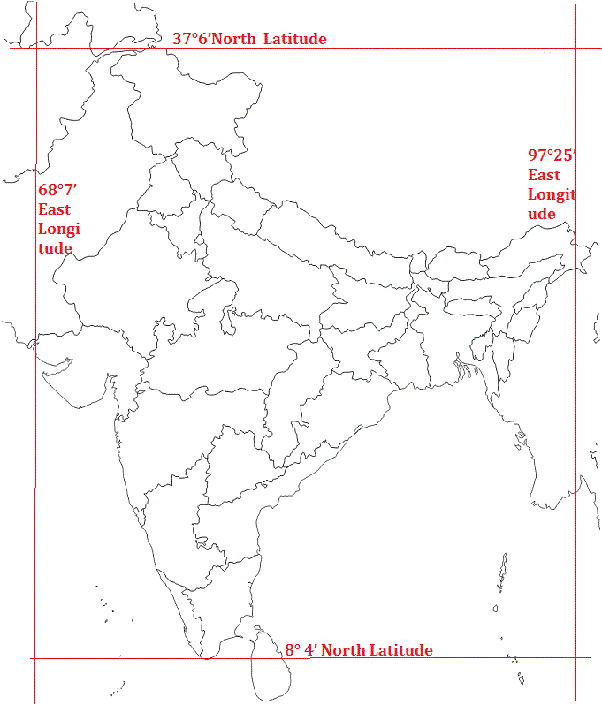

In [106]:
df_india = df.loc[(df['LATITUDE'] >=8) & (df['LATITUDE'] <=38) & (df['LONGITUDE'] >=68) & (df['LONGITUDE'] <=98)]

In [107]:
df_india.head()

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,CrimeLevel
0,12152,touching,27-05-2019 15:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,"Touching /Groping,",25.625485,85.055803,8
1,12149,whistling,17-05-2019 19:00,"Near Nissan Showroom, Bailey Rd, Patna, Bihar ...",I was in market with my mom. There I saw a man...,"Catcalls/Whistles,",25.619769,85.045596,2
61,12180,sexual harassment,08-12-2018 12:49,"Dongar Tamasi, Maharashtra, India",I saw a friend of mine being touched by a boy ...,"Commenting,",20.429047,80.149403,4
65,12176,question,08-12-2018 12:49,"Dongar Tamasi, Maharashtra, India",If you love somebody in your class should you ...,"Commenting,",20.429047,80.149403,4
83,12158,touching,17-04-2019 17:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My sister and I was going to eat golgappa and ...,"Commenting, Stalking, Touching /Groping,",25.625485,85.055803,8


In [111]:
len(df_india)

9712

In [112]:
df_india.to_csv("data_india.csv")

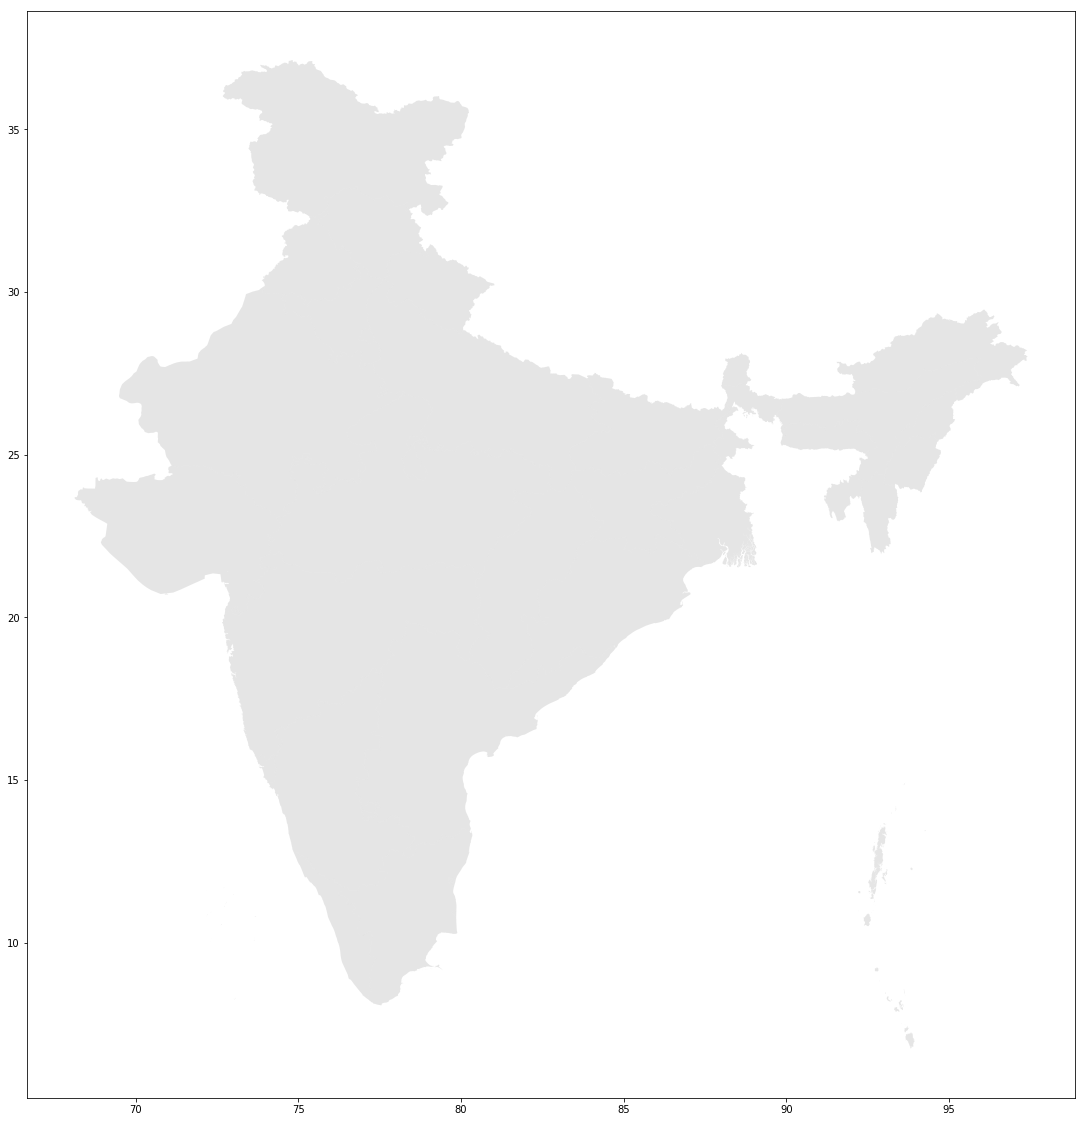

In [114]:
import geopandas as gpd
shapefile = gpd.read_file("INDIA.shp")


shapefile.plot(figsize=(20,20),alpha = 0.2 ,color = 'grey')

In [116]:
from shapely.geometry import Point,Polygon

geometry = [Point(xy) for xy in zip(df['LONGITUDE'],df['LATITUDE'])]

geometry[:3]

## Unit Testing on small amount (Not relevant)(Ignore)

In [12]:
test_arr = df[-10:]['CATEGORY'].values

test_arr

array(['Commenting, ',
       'Catcalls/Whistles, Commenting, Ogling/Lewd Facial Expressions/Staring, ',
       'Commenting, ', 'Rape / Sexual Assault, Stalking, ',
       'Commenting, ', 'Others, Commenting, ', 'Commenting, ',
       'Commenting, ', 'Ogling/Lewd Facial Expressions/Staring, ',
       'Human Trafficking, Stalking, Taking pictures without permission, Catcalls/Whistles, Commenting, Indecent Exposure/Masturbation in public, Touching /Groping, Poor / No Street Lighting, Petty Robbery, '],
      dtype=object)

In [91]:
crime_level

[4, 5, 4, 9, 4, 4, 4, 4, 5, 8]

In [92]:
len(crime_level)

10

In [94]:
for row in test_arr:
    print(row)

Commenting, 
Catcalls/Whistles, Commenting, Ogling/Lewd Facial Expressions/Staring, 
Commenting, 
Rape / Sexual Assault, Stalking, 
Commenting, 
Others, Commenting, 
Commenting, 
Commenting, 
Ogling/Lewd Facial Expressions/Staring, 
Human Trafficking, Stalking, Taking pictures without permission, Catcalls/Whistles, Commenting, Indecent Exposure/Masturbation in public, Touching /Groping, Poor / No Street Lighting, Petty Robbery, 
